In [6]:
import numpy as np
import dask , dask.distributed
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmocean.cm as cmo
import warnings
warnings.simplefilter('ignore')
import dask_jobqueue
from astropy.convolution import Box2DKernel, convolve
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator, LongitudeLocator)
import matplotlib.gridspec as gridspec
from fix_grid import fix_grid

In [2]:
pathf='/gxfs_work/geomar/smomw577/mesoscale_eddies/BOX_filtered/0181-0190/'
corr=xr.open_dataset(pathf+'3x3box_mean_corr_monthly_0181-0190_all.nc')
corr=fix_grid(corr)

#ds_corr_xmean=corr.mean('xt_ocean')
#ds_corr_cc_xmean=ds_corr_cc.mean('xt_ocean')

pathp='/gxfs_home/geomar/smomw577/plots/Boxcar/0181-0190/'

# line plots next to corr

In [9]:
#for ctrl
def linemap(var, name, longname,ds=corr):
    fig = plt.figure(figsize=(10,4),layout='compressed')
    gs = gridspec.GridSpec(1, 2, width_ratios=[1,4])
    
    data=corr[var].where(corr[var]<=1).where(corr[var]>=-1)
    #data_cc=ds_corr_cc[var].where(ds_corr_cc[var]<=1).where(ds_corr_cc[var]>=-1)

    ax1 = fig.add_subplot(gs[1],projection=ccrs.PlateCarree(central_longitude=0))
    data.plot.contourf(ax=ax1, x='geolon_t', y='geolat_t', vmin=-1, vmax=1, cmap=cmo.balance, transform=ccrs.PlateCarree(), add_colorbar=False, levels=13)
    
    ax1.set_title('')
    gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                          linewidth=1, color='black', alpha=0.2)
    gl.xlabels_top = False
    gl.ylabels_left = False
    gl.xlabel_style = {'size': 14}
    gl.ylabel_style = {'size': 14}
    ax1.coastlines()
    
    ax2 = fig.add_subplot(gs[0])
    mean=data.mean('xt_ocean')
    #mean_cc=data_cc.mean('xt_ocean')
    mean.where(mean>=0).plot(ax=ax2, y='yt_ocean', c='firebrick')
    mean.where(mean<0).plot(ax=ax2, y='yt_ocean', c='royalblue')
    #mean_cc.plot(ax=ax2, y='yt_ocean', c='gray', linestyle='--')
    ax2.axvline(0, c='gray', linestyle='--')
    ax2.grid(linewidth=.5);
    ax2.set_title('')
    ax2.set_ylabel('Latitude')
    ax2.set_xlabel('Correlation')
    ax2.set_yticks([-60,-30,0,30,60])
    ax2.set_ylim([corr.yt_ocean.min(),corr.yt_ocean.max()])    
    fig.suptitle('Correlation '+longname, fontsize=18);
    plt.tight_layout()
    plt.savefig(pathp+'3x3box_linemap_contourf_'+name+'_monthly_0181-0190_noice.png', bbox_inches="tight", dpi=300)
    #plt.savefig(pathp+'3x3box_linemap_contourf_'+name+'_monthly_1PctTo2X_0181-0190_noice.png', bbox_inches="tight", dpi=300)

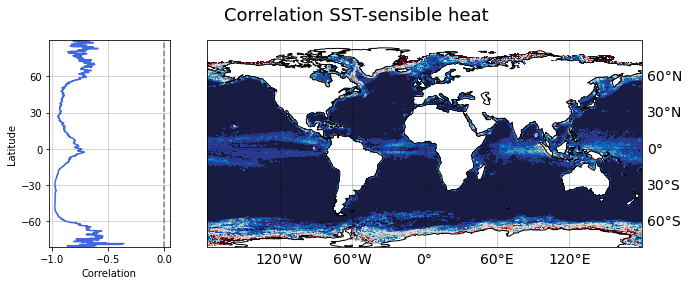

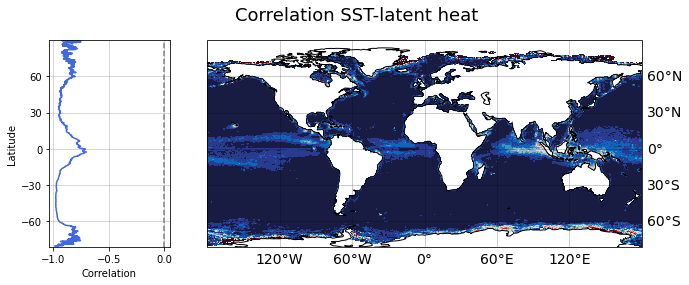

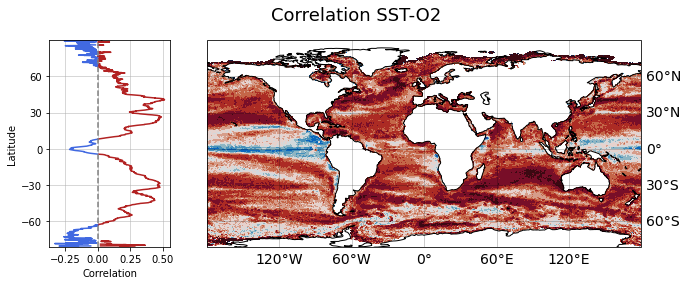

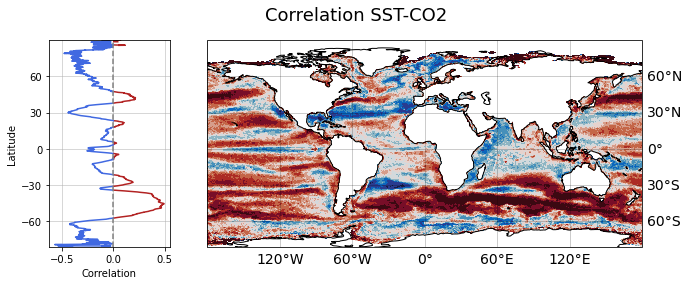

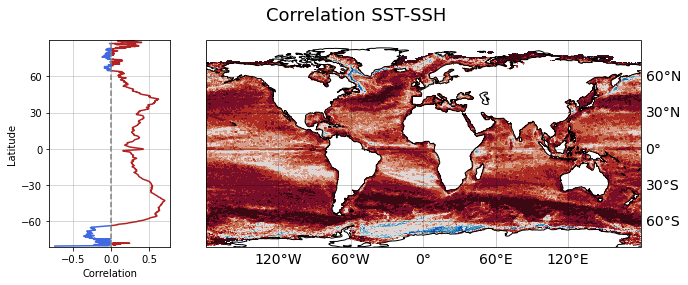

In [10]:
linemap('corr_sst_sens_heat', 'sst_sh', 'SST-sensible heat')
linemap('corr_sst_evap_heat', 'sst_lh', 'SST-latent heat')
linemap('corr_sst_o2_stf', 'sst_o2', 'SST-O2')
linemap('corr_sst_dic_stf', 'sst_co2', 'SST-CO2')
linemap('corr_sst_SSH', 'sst_ssh', 'SST-SSH')

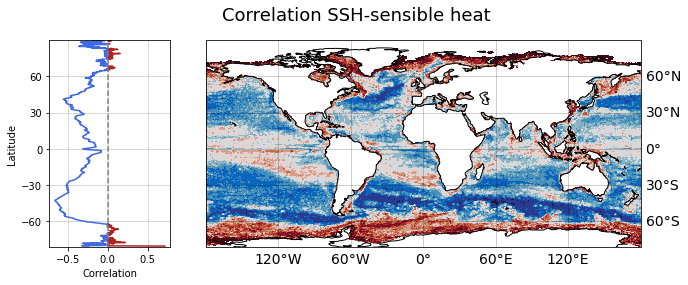

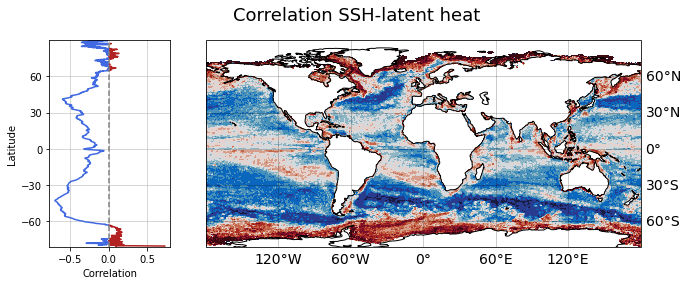

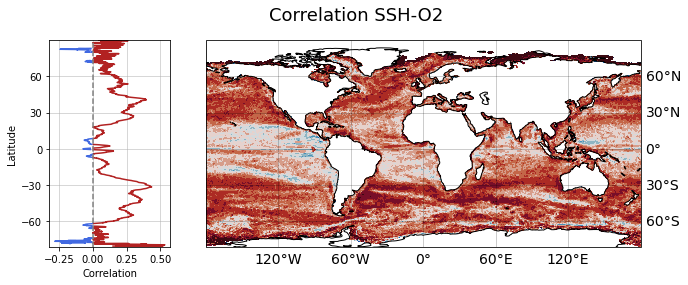

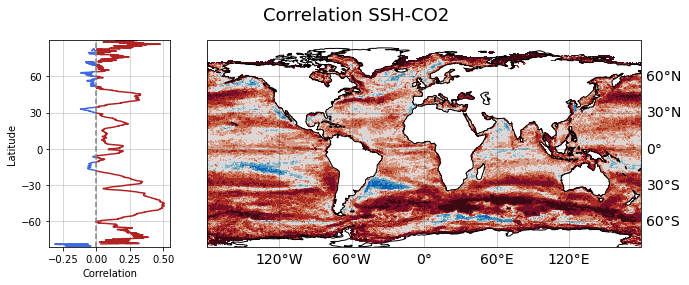

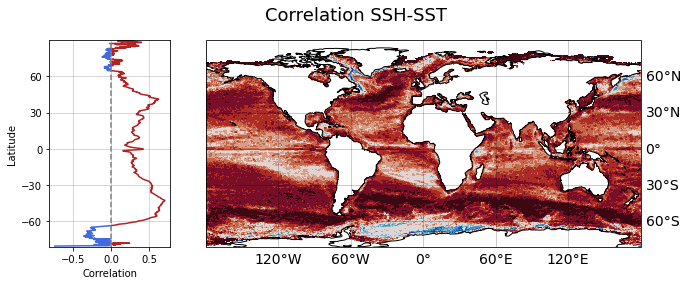

In [11]:
###if needed, run this again
linemap('corr_ssh_sens_heat', 'ssh_sh', 'SSH-sensible heat')
linemap('corr_ssh_evap_heat', 'ssh_lh', 'SSH-latent heat')
linemap('corr_ssh_o2_stf', 'ssh_o2', 'SSH-O2')
linemap('corr_ssh_dic_stf', 'ssh_co2', 'SSH-CO2')
linemap('corr_ssh_SST', 'ssh_sst', 'SSH-SST')

## get colorbar

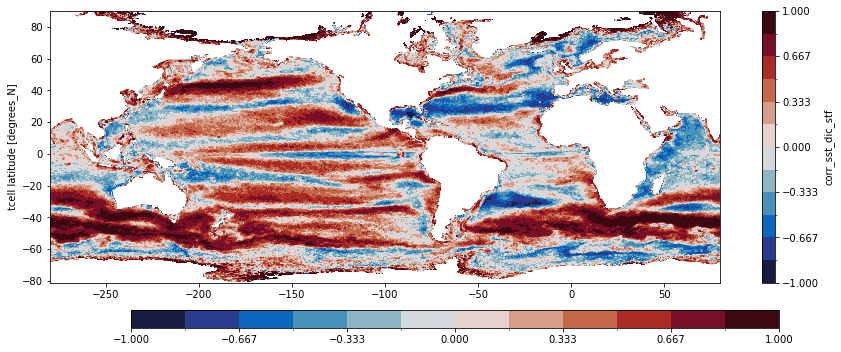

In [31]:
####only for cbar
fig=plt.figure(figsize=(15,5))
data=ds_corr['corr_sst_dic_stf'].where(ds_corr['corr_sst_dic_stf']<=1).where(ds_corr['corr_sst_dic_stf']>=-1)
im=data.plot.contourf(vmin=-1, vmax=1, cmap=cmo.balance, levels=13)
plt.xlabel('')
cbar_ax = fig.add_axes([0.2, 0.0, 0.6, 0.05])  # Left, bottom, width, height.

cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', extend=False)
plt.savefig('/gxfs_home/geomar/smomw577/plots/Boxcar/cmap_2.png', bbox_inches="tight", dpi=300)